<a href="https://colab.research.google.com/github/Endrew-42/farmtech-fase6/blob/main/yolo_customizado_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparação do Ambiente e Dataset. Esta célula instala a biblioteca gdown e a utiliza para baixar o arquivo ZIP contendo todo o dataset de imagens, rótulos (no formato YOLO) e o arquivo de configuração (.yaml) do projeto. Em seguida, descompacta o arquivo no ambiente do Colab.

Caso apareça a seguinte mensagem para você durante a execução da célula 1:
"replace /content/arquivos/colab_fase6_cap1/arquivos/teste/rotated_frame00176.png? [y]es, [n]o, [A]ll, [N]one, [r]ename:" é porque você já baixou o arquivo ZIP e ele está tentando baixar novamente, a resposta mais segura nesse caso seria "A" pois ele vai substituir o arquivo zip anterior, o que é útil caso na tentativa anterior de baixar o arquivo ZIP tenha ocorrido algum problema com o download.

In [ ]:
# Célula 1: Baixar e descompactar os arquivos do zip
!pip install gdown
import gdown
gdown.download('https://drive.google.com/uc?id=1IIBVb_WyhxokNdHeF3kerjOHCpL_Y8GK', '/content/colab_fase6_cap1.zip', quiet=False)
!unzip /content/colab_fase6_cap1.zip -d /content/arquivos

Downloading...
From (original): https://drive.google.com/uc?id=1IIBVb_WyhxokNdHeF3kerjOHCpL_Y8GK
From (redirected): https://drive.google.com/uc?id=1IIBVb_WyhxokNdHeF3kerjOHCpL_Y8GK&confirm=t&uuid=dd55f324-f5f0-4736-ae7e-9ab53b1bcd0b
To: /content/colab_fase6_cap1.zip
100%|██████████| 254M/254M [00:01<00:00, 135MB/s]


Archive:  /content/colab_fase6_cap1.zip
   creating: /content/arquivos/colab_fase6_cap1/arquivos/labels/
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/teste/rotated_frame00176.png  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/teste/frame00116.png  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/teste/rotated_frame00226.png  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/teste/rotated_frame00181.png  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/caneca_pote.yaml  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/teste/frame00161.png  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/imagens/val.cache  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/teste/frame00026.png  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/imagens/val/rotated_frame00456.txt  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/imagens/val/frame00156.txt  
  inflating: /content/arquivos/colab_fase6_cap1/arquivos/i

Instalação do Framework. Utiliza o comando git clone para baixar o código-fonte oficial do modelo YOLOv5 do GitHub. Isso cria o diretório de trabalho onde estarão localizados todos os scripts necessários para o treinamento e detecção de objetos.

In [ ]:
# Célula 2: Clonar repositório YOLOv5 e instalar dependências
!git clone https://github.com/ultralytics/yolov5.git /content/yolov5
!pip install -r /content/yolov5/requirements.txt

Cloning into '/content/yolov5'...
remote: Enumerating objects: 17608, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17608 (delta 7), reused 2 (delta 2), pack-reused 17593 (from 2)
Receiving objects: 100% (17608/17608), 16.82 MiB | 13.66 MiB/s, done.
Resolving deltas: 100% (11983/11983), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.3 MB/s eta 0:00:00


Configuração de Bibliotecas. Instala todas as dependências de software listadas no arquivo requirements.txt do YOLOv5. Isso é crucial para garantir que todas as bibliotecas Python (como PyTorch e outras ferramentas de processamento de imagem) estejam disponíveis para rodar o modelo.

In [ ]:
# Célula 3: Criar diretório data e copiar caneca_pote.yaml
!mkdir -p /content/yolov5/data
!cp /content/arquivos/colab_fase6_cap1/arquivos/caneca_pote.yaml /content/yolov5/data

Treinamento da Rede Neural. Inicia o processo de aprendizado da Rede Neural YOLOv5. O script utiliza a arquitetura base (yolov5s), o arquivo de configuração de dados (.yaml) e executa o treinamento pelo número de épocas especificado, gerando um modelo customizado capaz de detectar as classes definidas (Caneca e Pote).

In [ ]:
# Célula 4: Treinar o modelo YOLOv5
!python /content/yolov5/train.py --data /content/yolov5/data/caneca_pote.yaml --weights yolov5s.pt --img 640 --epochs 5

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-15 00:47:37.645746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760489257.670835     621 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760489257.678235     621 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

Avaliação Métrica Oficial do Modelo. Esta célula executa o script de Validação do YOLOv5 (val.py) usando o modelo que foi treinado. O objetivo é calcular métricas de desempenho padronizadas (como mAP - mean Average Precision - e Loss) e gerar todos os gráficos e artefatos de avaliação, incluindo a Matriz de Confusão e o Gráfico de Desempenho.

In [ ]:
# Célula de Validação Explícita do Modelo Treinado (CORRIGIDA)

%cd /content/yolov5

print("Iniciando Validação do Modelo Treinado...")

!python val.py --weights runs/train/exp/weights/best.pt --data /content/arquivos/colab_fase6_cap1/arquivos/caneca_pote.yaml --img 640 --name val_exp

/content/yolov5
Iniciando Validação do Modelo Treinado...
val: data=/content/arquivos/colab_fase6_cap1/arquivos/caneca_pote.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=val_exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/arquivos/colab_fase6_cap1/arquivos/imagens/val.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 0.900s exceeded
                 Class     Images  Instances          P          R      mAP50   mAP

Visualização da Matriz de Confusão de Validação. Esta célula tem o único propósito de localizar e exibir o arquivo de imagem da Matriz de Confusão (confusion_matrix.png) que foi gerado pela célula de Validação anterior (val.py). O gráfico é crucial para uma análise visual e rápida sobre a performance do modelo, mostrando onde ele acertou e errou em cada classe.

Buscando Matriz de Confusão em: runs/val/val_exp/confusion_matrix.png


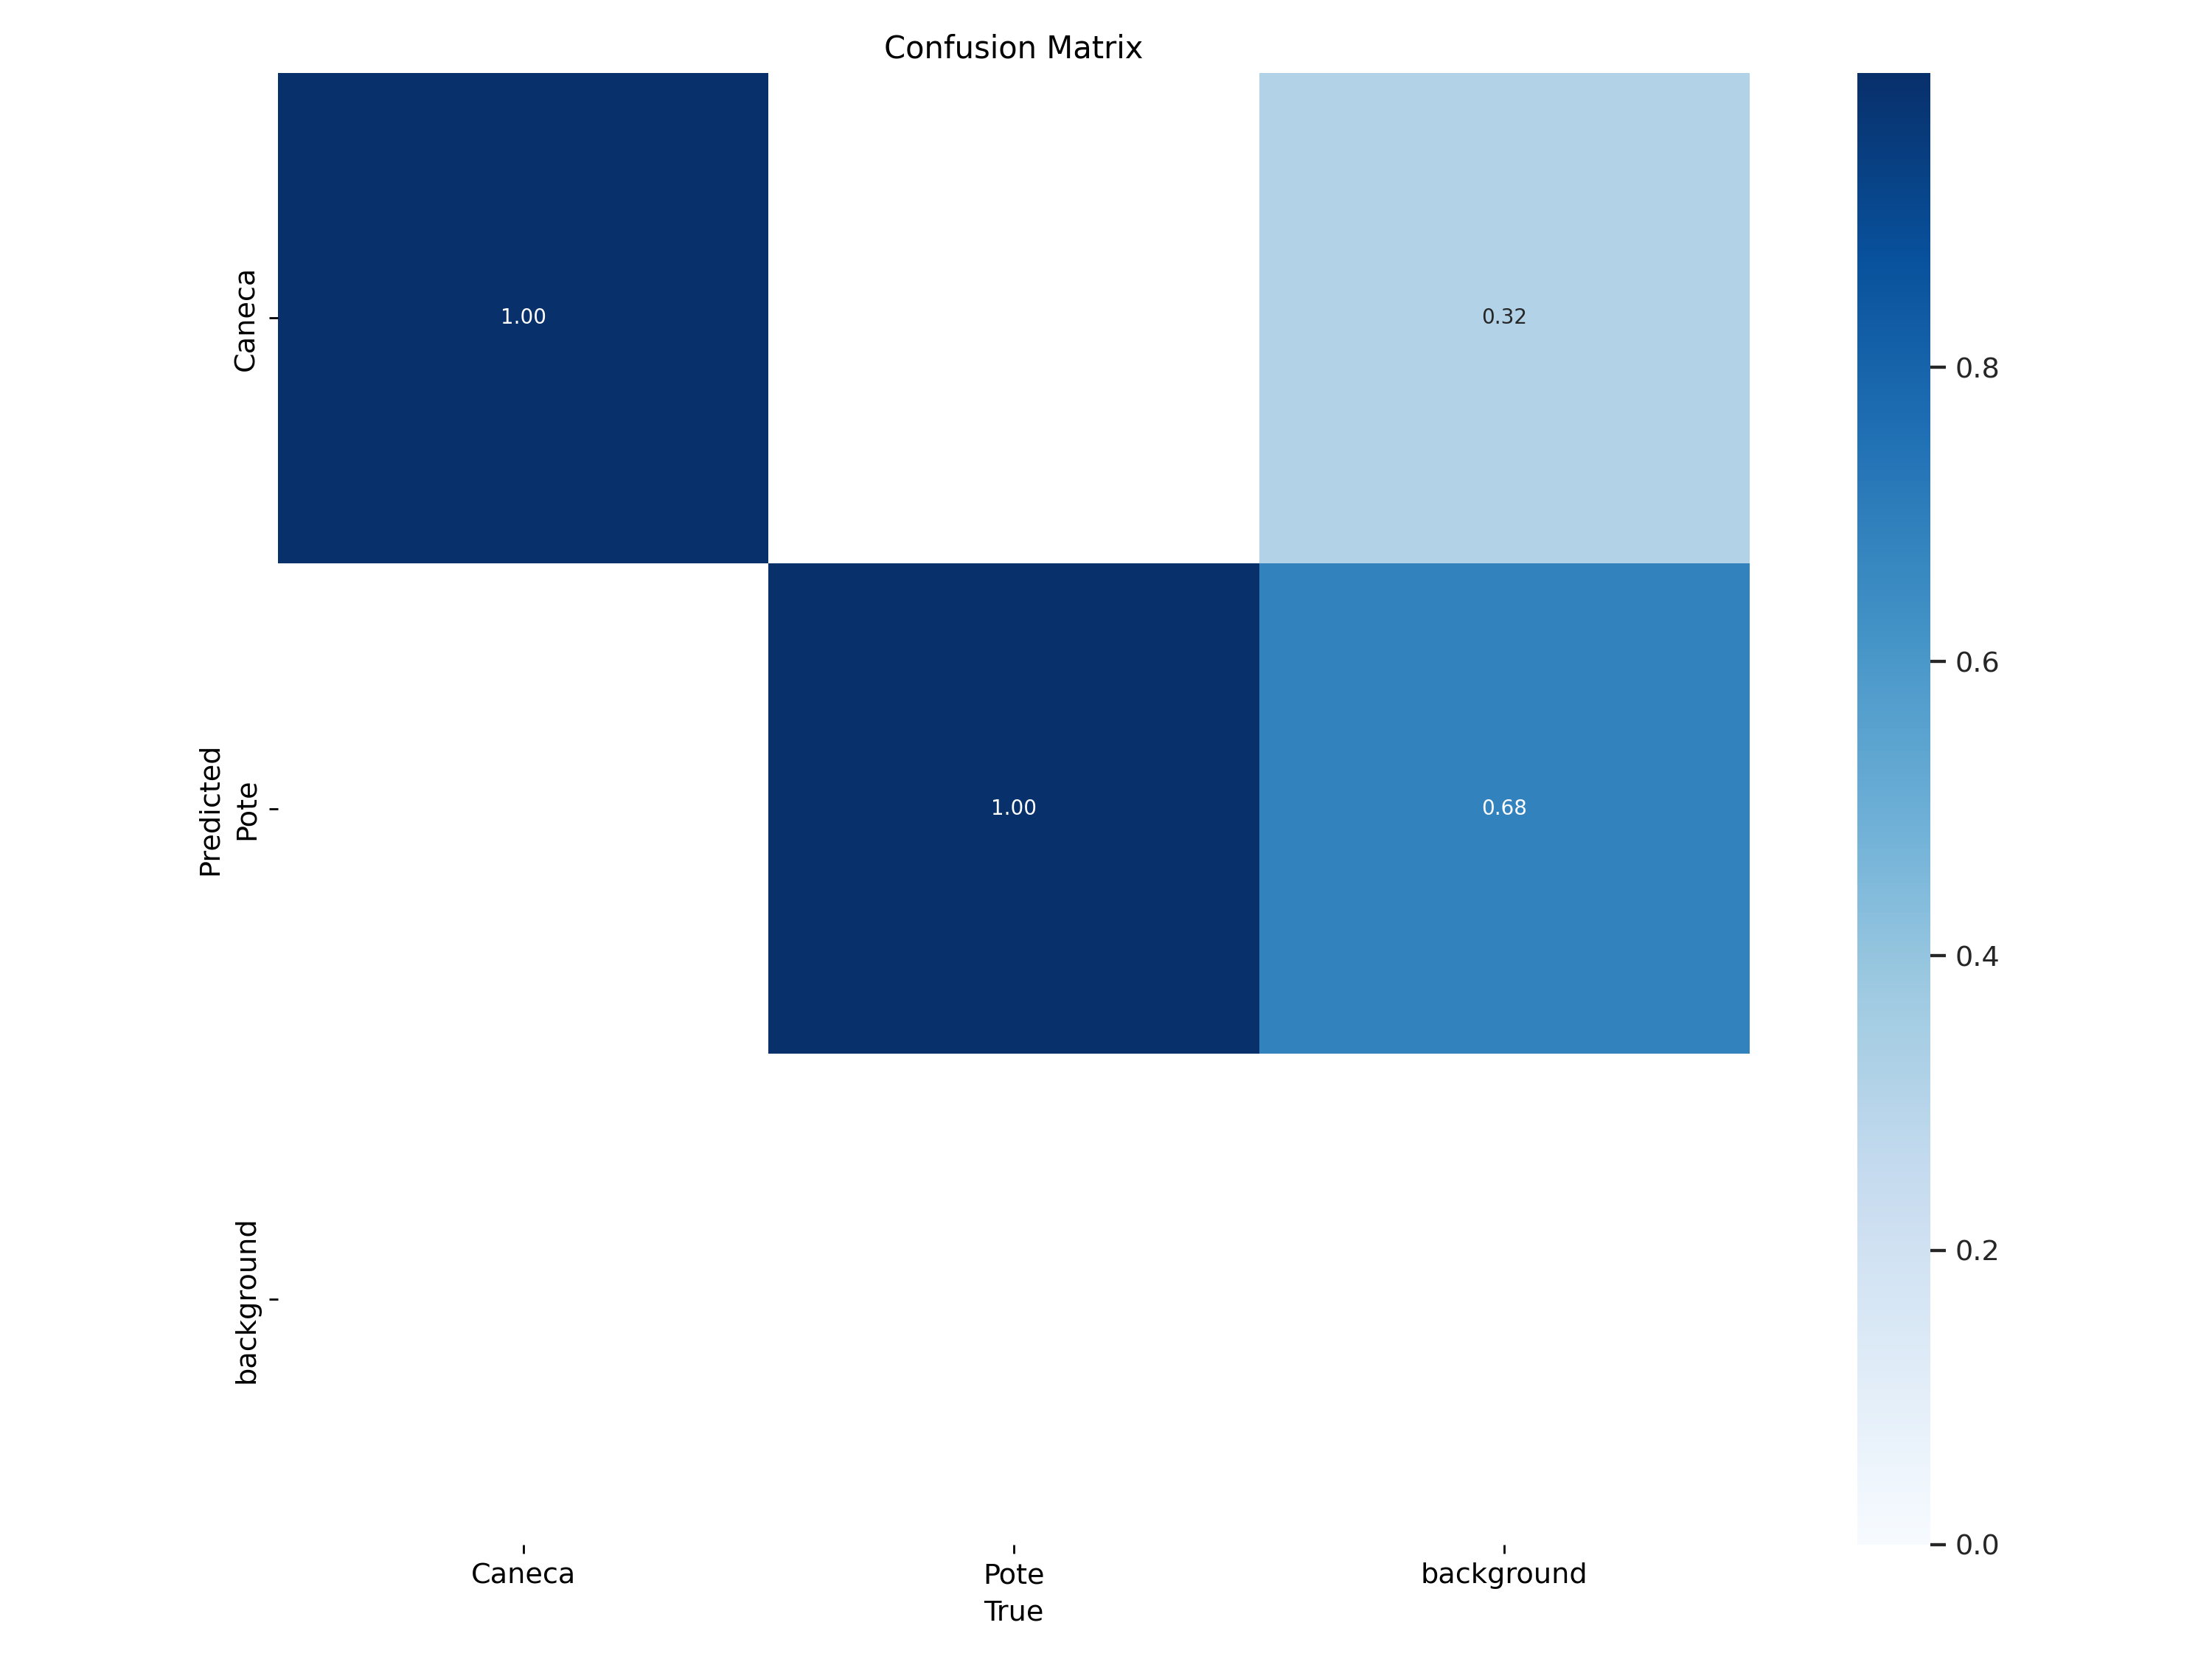

In [ ]:
# Célula para Visualizar o Gráfico de Confusão

from IPython.display import Image, display

caminho_matriz = 'runs/val/val_exp/confusion_matrix.png'

print(f"Buscando Matriz de Confusão em: {caminho_matriz}")

try:
    display(Image(filename=caminho_matriz))
except FileNotFoundError:
    print("\nERRO: Matriz de confusão não encontrada.")